In [24]:
# !pip install fiftyone

In [25]:
# !pip install opencv-python==4.5.5.64

In [26]:
# !apt-get update && apt-get install ffmpeg libsm6 libxext6  -y

In [27]:
# !pip install -U 'git+https://github.com/leimao/cocoapi.git#subdirectory=PythonAPI'

In [31]:
# import fiftyone as fo
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

In [10]:
from pycocotools.coco import COCO

In [11]:
coco_annotation_file_path = "/opt/patchcore/data/images/instances_default.json"

coco_annotation = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [13]:
coco_annotation.info()

contributor: 
date_created: 
description: 
url: 
version: 
year: 


In [14]:
# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.

# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

Number of Unique Categories: 44
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Categories Names:
['consolidation', 'pneumoperitoneum', 'device', 'fracture', 'airspace-opacity', 'nodule', 'mass', 'lymphandopathy', 'pneumomediastinum', 'cardiomegaly', 'athersclerotic-calcification', 'wire', 'atelectasis', 'picc', 'vascular-catheter', 'chest-port', 'surgical-clip', 'stent', 'tavr', 'jewlery', 'rib-resection', 'fracture-chronic', 'pleural-effusion', 'surgical-drain', 'sternotomy-wires', 'pneumothorax', 'saline-implant-port', 'lap-band', 'emphysema', 'normal', 'endotracheal-tube', 'reticular-opacity', 'ossification', 'gastric-tube', 'coil', 'icd', 'sub-q-emphysema', 'vad', 'scoliosis', 'annuloplasty', 'tracheostomy-tube', 'hiatal-hernia', 'granuloma', 'breast-implant']


In [16]:
# Category ID -> Category Name.
query_id = cat_ids[0]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

# Category Name -> Category ID.
query_name = cat_names[2]
query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
print("Category Name -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")

# Get the ID of all the images containing the object of the category.
img_ids = coco_annotation.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

Category ID -> Category Name:
Category ID: 1, Category Name: consolidation, Supercategory: 
Category Name -> ID:
Category Name: device, Category ID: 3
Number of Images Containing device: 18


In [21]:
img_info

{'id': 34,
 'width': 2828,
 'height': 2320,
 'file_name': 'valid/patient64682/study1/view1_frontal.jpg',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0}

In [29]:
data_dir = '/opt/patchcore/data/images'

Image ID: 34, File Name: valid/patient64682/study1/view1_frontal.jpg, Image URL: 
Annotations for Image ID 34:
[{'id': 80, 'image_id': 34, 'category_id': 5, 'segmentation': [[1602.13, 287.92, 1582.75, 617.37, 1568.91, 894.22, 1563.37, 1088.02, 1615.97, 1157.23, 1790.39, 1184.92, 1898.36, 1243.05, 2053.39, 1303.96, 2172.44, 1276.28, 2225.04, 1173.84, 2108.76, 874.84, 1989.72, 556.47, 1923.27, 359.9, 1768.24, 171.65, 1599.36, 124.58]], 'area': 484685.0, 'bbox': [1563.37, 124.58, 661.67, 1179.38], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 81, 'image_id': 34, 'category_id': 3, 'segmentation': [[1184.09, 71.98, 1181.32, 606.3, 1214.54, 949.59, 1316.97, 980.05, 1483.08, 980.05, 1596.59, 750.26, 1596.59, 318.38, 1555.06, 69.21, 1557.83, 19.38, 1272.68, 11.07, 1170.24, 11.07]], 'area': 372009.0, 'bbox': [1170.24, 11.07, 426.35, 968.98], 'iscrowd': 0, 'attributes': {'occluded': False}}]


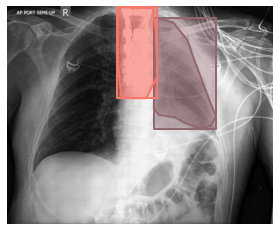

In [33]:
# Pick one image.
img_id = img_ids[2]
img_info = coco_annotation.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
img_url = img_info["coco_url"]
print(
    f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
)

# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)

# Use URL to load image.
im = Image.open(os.path.join(data_dir, img_info['file_name']))

# Save image and its labeled version.
plt.axis("off")
plt.imshow(np.asarray(im), cmap='gray')
plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
# Plot segmentation and bounding box.
coco_annotation.showAnns(anns, draw_bbox=True)